In [289]:
import pandas as pd
from IPython.display import display
import numpy as np
import string
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [290]:
df = pd.read_csv('/content/investing_export (1).csv')

In [291]:
# It shows the number of rows and columns
df.shape

(415, 8)

In [292]:
# Checking for null-values and datatypes of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         415 non-null    object 
 1   score         415 non-null    int64  
 2   id            415 non-null    object 
 3   subreddit     415 non-null    object 
 4   url           415 non-null    object 
 5   num_comments  415 non-null    int64  
 6   body          415 non-null    object 
 7   created       415 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 26.1+ KB


In [293]:
# Converting created into datetime format to get the date and time of the comments
df['created'] = pd.to_datetime(df['created'], unit='s')

In [294]:
# Shows the first five rows of the data.
df.head()

,title,score,id,subreddit,url,num_comments,body,created
0,Daily General Discussion and Advice Thread - D...,5,zvk27j,investing,https://www.reddit.com/r/investing/comments/zv...,34,Have a general question? Want to offer some c...,2022-12-26 10:01:10
1,"Annual year-end explanation for large, unexpec...",286,zs1idl,investing,https://www.reddit.com/r/investing/comments/zs...,36,A mutual fund is essentially just a basket of ...,2022-12-21 21:29:43
2,"Tesla is now ""post golden age""",689,zvl0ug,investing,https://www.reddit.com/r/investing/comments/zv...,629,"If you can't see the writing on the wall, then...",2022-12-26 11:08:41
3,Is it wise to use your travel fund to invest i...,359,zuxwt9,investing,https://www.reddit.com/r/investing/comments/zu...,185,"2 months ago, I finished saving up my travel f...",2022-12-25 13:14:13
4,"""Musk Destroys Tesla Image in Germany"" and the...",468,zuwhmf,investing,https://www.reddit.com/r/investing/comments/zu...,287,I often see interesting articles posted in thi...,2022-12-25 11:33:05


In [295]:
# Dropping ID column as it holds no real significance

df.drop(columns=['id'], inplace=True)

## There is no missing values in the dataset

In [296]:
# Descriptive Stats for numerical features
df.describe()

,score,num_comments
count,415.000000,415.000000
mean,67.609639,49.332530
std,197.178006,97.154493
min,0.000000,0.000000
25%,0.000000,7.000000
50%,5.000000,16.000000
75%,27.500000,47.500000
max,1842.000000,864.000000


In [297]:
# Check for missing values in each column
df.isnull().sum()

# Check for missing values in the entire DataFrame
df.isnull().values.any()


False

#  Checking the level of correlation between 'score', 'num_comments'.

In [298]:
correlations = df.corr()
print(correlations)

                 score  num_comments
score         1.000000      0.687571
num_comments  0.687571      1.000000


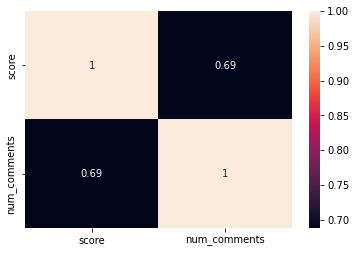

In [299]:
from pandas.core.internals.managers import annotations
#score and num_comments are highly correlated
sns.heatmap(df.corr(), annot=True)

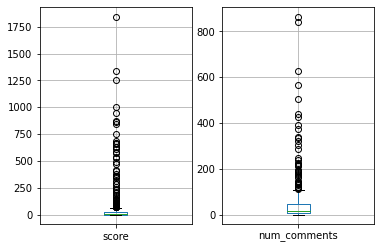

In [300]:
# Boxplots to check the for outliers
plt.subplot(1,2,1)
df[['score']].boxplot()
plt.subplot(1,2,2)
df[['num_comments']].boxplot()

### *Above boxplots for feature 'score' and 'num_comments' indicate a high number of outliers in the column, but because the score is relevant to the quantity of comments and the calibre of the Reddit account, outlier treatment can result in the loss of crucial information.*

(array([351.,  37.,  13.,   5.,   3.,   2.,   1.,   1.,   0.,   2.]),
 array([  0. ,  86.4, 172.8, 259.2, 345.6, 432. , 518.4, 604.8, 691.2,
        777.6, 864. ]),
 <a list of 10 Patch objects>)

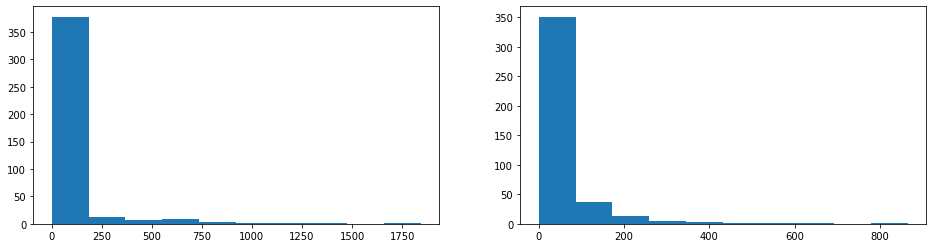

In [301]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.hist(df['score'])
plt.subplot(1,2,2)
plt.hist(df['num_comments'])


### Above plots shows the distribution of 'scores' and 'num_comments'. 

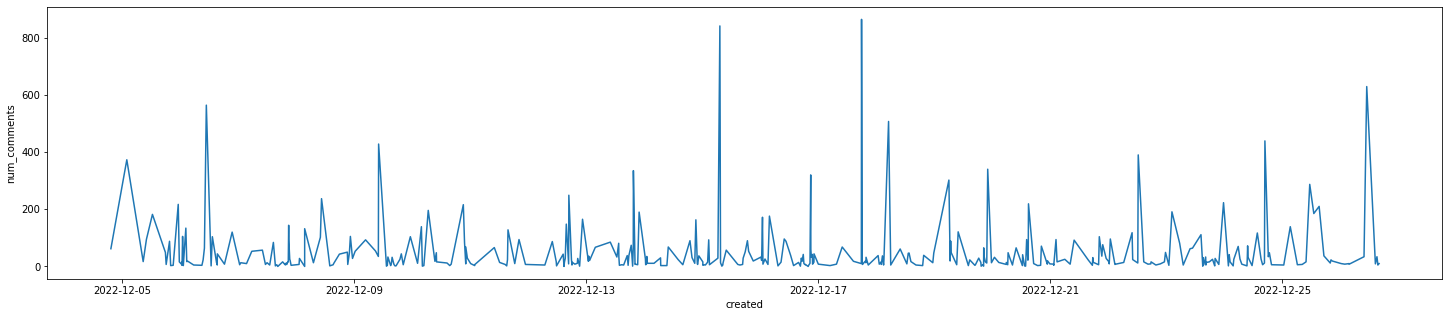

In [302]:
# A plot of 'number of comments' vs 'date'

plt.figure(figsize=(25,5))
sns.lineplot(y=df['num_comments'], x=df['created'], markers=True)


In [303]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [304]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **List of all the words in 'title' column**

In [305]:
# Coverting to lower case
df['title']= df['title'].str.lower()

# Create a list of all the words in the column
words_title = ' '.join(df['title']).split()
print(words_title)
print('\nNumber of total words in title:', len(words_title))

['daily', 'general', 'discussion', 'and', 'advice', 'thread', '-', 'december', '26,', '2022', 'annual', 'year-end', 'explanation', 'for', 'large,', 'unexpected', 'drops', 'in', 'your', 'mutual', 'fund.', 'read', 'this', 'before', 'making', 'your', 'own', 'post', 'please.', 'tesla', 'is', 'now', '"post', 'golden', 'age"', 'is', 'it', 'wise', 'to', 'use', 'your', 'travel', 'fund', 'to', 'invest', 'in', 'this', 'current', 'market', 'condition?', '"musk', 'destroys', 'tesla', 'image', 'in', 'germany"', 'and', 'the', 'future', 'of', 'ev', 'competition', 'personal', 'roth', 'or', '529', 'for', 'my', 'kid?', 'is', 'there', 'any', 'general', 'rule', 'or', 'guidance', 'for', 'averaging', 'down', 'cost', 'basis', 'for', 'long', 'term', 'investments?', 'avantis', 'reit', 'allocation?', 'ginger', 'ale', 'portfolio.', 'better', 'investment', 'than', 'i-bonds?', 'snvxx,', 'snoxx', 'or', 'swvxx', 'for', 'cash?', 'someone', 'please', 'explain', 'this', '(bonds)', 'roth', 'ira', 'communication', 'red',

In [306]:
# Filter out the stop words
stop_words = set(stopwords.words('english'))

filtered_title = []
 
for w in words_title:
    if w not in stop_words:
        filtered_title.append(w)
        
print(filtered_title)
print('\nNumber of total words in title after removing stopwords:', len(filtered_title))

['daily', 'general', 'discussion', 'advice', 'thread', '-', 'december', '26,', '2022', 'annual', 'year-end', 'explanation', 'large,', 'unexpected', 'drops', 'mutual', 'fund.', 'read', 'making', 'post', 'please.', 'tesla', '"post', 'golden', 'age"', 'wise', 'use', 'travel', 'fund', 'invest', 'current', 'market', 'condition?', '"musk', 'destroys', 'tesla', 'image', 'germany"', 'future', 'ev', 'competition', 'personal', 'roth', '529', 'kid?', 'general', 'rule', 'guidance', 'averaging', 'cost', 'basis', 'long', 'term', 'investments?', 'avantis', 'reit', 'allocation?', 'ginger', 'ale', 'portfolio.', 'better', 'investment', 'i-bonds?', 'snvxx,', 'snoxx', 'swvxx', 'cash?', 'someone', 'please', 'explain', '(bonds)', 'roth', 'ira', 'communication', 'red', 'flags?', 'investing', 'outside', 'stocks', 'making', 'sure', 'understand', 'wash-sale', 'rule', 'buying', 'treasuries', 'primary', 'vs', 'secondary', 'market', 'people', 'reading', 'far', 'tesla’s', 'stock', 'losses?', 'question', 're:', 'div

# **List of all the words in the 'body' column**

In [307]:
# Coverting to lower case
df['body']= df['body'].str.lower()

# Create a list of all the words in the column
words_body = ' '.join(df['body']).split()
print(words_body)
print('\nNumber of total words in body:', len(words_body))


['have', 'a', 'general', 'question?', 'want', 'to', 'offer', 'some', 'commentary', 'on', 'markets?', 'maybe', 'you', 'would', 'just', 'like', 'to', 'throw', 'out', 'a', 'neat', 'fact', 'that', "doesn't", 'warrant', 'a', 'self', 'post?', 'feel', 'free', 'to', 'post', 'here!', 'if', 'your', 'question', 'is', '"i', 'have', '$10,000,', 'what', 'do', 'i', 'do?"', 'or', 'other', '"advice', 'for', 'my', 'personal', 'situation"', 'questions,', 'you', 'should', 'include', 'relevant', 'information,', 'such', 'as', 'the', 'following:', '*', 'how', 'old', 'are', 'you?', 'what', 'country', 'do', 'you', 'live', 'in?', '*', 'are', 'you', 'employed/making', 'income?', 'how', 'much?', '*', 'what', 'are', 'your', 'objectives', 'with', 'this', 'money?', '(buy', 'a', 'house?', 'retirement', 'savings?)', '*', 'what', 'is', 'your', 'time', 'horizon?', 'do', 'you', 'need', 'this', 'money', 'next', 'month?', 'next', '20yrs?', '*', 'what', 'is', 'your', 'risk', 'tolerance?', '(do', 'you', 'mind', 'risking', 'i

In [308]:
# Filter out the stop words
stop_words = set(stopwords.words('english'))

filtered_body = []
 
for w in words_body:
    if w not in stop_words:
        filtered_body.append(w)
        
print(filtered_body)
print('\nNumber of total words in body after removing stopwords:', len(filtered_body))

['general', 'question?', 'want', 'offer', 'commentary', 'markets?', 'maybe', 'would', 'like', 'throw', 'neat', 'fact', 'warrant', 'self', 'post?', 'feel', 'free', 'post', 'here!', 'question', '"i', '$10,000,', 'do?"', '"advice', 'personal', 'situation"', 'questions,', 'include', 'relevant', 'information,', 'following:', '*', 'old', 'you?', 'country', 'live', 'in?', '*', 'employed/making', 'income?', 'much?', '*', 'objectives', 'money?', '(buy', 'house?', 'retirement', 'savings?)', '*', 'time', 'horizon?', 'need', 'money', 'next', 'month?', 'next', '20yrs?', '*', 'risk', 'tolerance?', '(do', 'mind', 'risking', 'blackjack', 'need', 'know', '100%', 'safe?)', '*', 'current', 'holdings?', '(do', 'already', 'exposure', 'specific', 'funds', 'sectors?', 'assets?)', '*', 'big', 'debts', '(include', 'interest', 'rate)', 'expenses?', '*', 'relevant', 'financial', 'information', 'useful', 'give', 'proper', 'answer.', 'please', 'consider', 'consulting', 'faq', 'first', '-', 'https://www.reddit.com/

# **3-grams of 'title' column**

In [309]:
import csv
import nltk

def find_ngrams(filename, column, n):
    ngrams = []
    with open(filename) as f:
        reader = csv.reader(f)
        for row in reader:
            ngrams.extend(nltk.ngrams(row[column].split(), n))
    return [' '.join(ngram) for ngram in ngrams]

ngrams = find_ngrams("investing_export (1).csv", 0, 3)
print(ngrams)


['Daily General Discussion', 'General Discussion and', 'Discussion and Advice', 'and Advice Thread', 'Advice Thread -', 'Thread - December', '- December 26,', 'December 26, 2022', 'Annual year-end explanation', 'year-end explanation for', 'explanation for large,', 'for large, unexpected', 'large, unexpected drops', 'unexpected drops in', 'drops in your', 'in your mutual', 'your mutual fund.', 'mutual fund. Read', 'fund. Read this', 'Read this before', 'this before making', 'before making your', 'making your own', 'your own post', 'own post please.', 'Tesla is now', 'is now "post', 'now "post golden', '"post golden age"', 'Is it wise', 'it wise to', 'wise to use', 'to use your', 'use your travel', 'your travel fund', 'travel fund to', 'fund to invest', 'to invest in', 'invest in this', 'in this current', 'this current market', 'current market condition?', '"Musk Destroys Tesla', 'Destroys Tesla Image', 'Tesla Image in', 'Image in Germany"', 'in Germany" and', 'Germany" and the', 'and th

# **3-grams of 'body' column**

In [310]:
import csv
import nltk

def find_ngrams(filename, column, n):
    ngrams = []
    with open(filename) as f:
        reader = csv.reader(f)
        for row in reader:
            ngrams.extend(nltk.ngrams(row[column].split(), n))
    return [' '.join(ngram) for ngram in ngrams]

ngrams = find_ngrams("investing_export (1).csv", 6, 3)
print(ngrams)

['Have a general', 'a general question?', 'general question? Want', 'question? Want to', 'Want to offer', 'to offer some', 'offer some commentary', 'some commentary on', 'commentary on markets?', 'on markets? Maybe', 'markets? Maybe you', 'Maybe you would', 'you would just', 'would just like', 'just like to', 'like to throw', 'to throw out', 'throw out a', 'out a neat', 'a neat fact', 'neat fact that', "fact that doesn't", "that doesn't warrant", "doesn't warrant a", 'warrant a self', 'a self post?', 'self post? Feel', 'post? Feel free', 'Feel free to', 'free to post', 'to post here!', 'post here! If', 'here! If your', 'If your question', 'your question is', 'question is "I', 'is "I have', '"I have $10,000,', 'have $10,000, what', '$10,000, what do', 'what do I', 'do I do?"', 'I do?" or', 'do?" or other', 'or other "advice', 'other "advice for', '"advice for my', 'for my personal', 'my personal situation"', 'personal situation" questions,', 'situation" questions, you', 'questions, you 

# **WordCloud of the 'title' column**

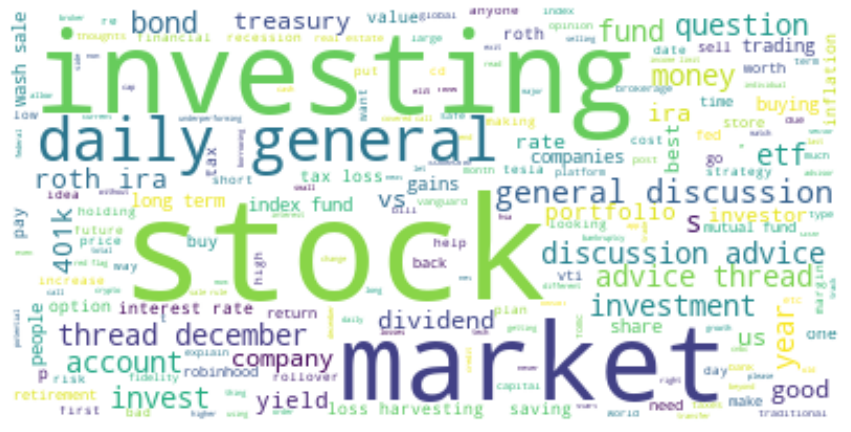

In [311]:
text = " ".join(i for i in filtered_title)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# **WordCloud of the 'body' column**

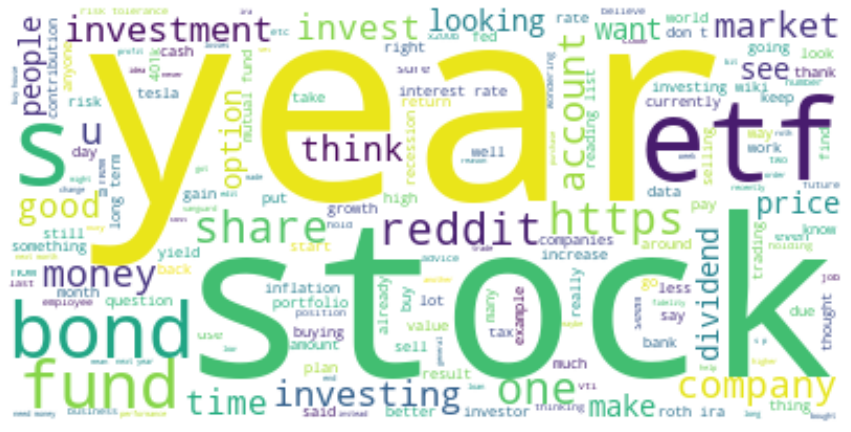

In [312]:
text_body = " ".join(i for i in filtered_body)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_body)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Punctuation was removed and a dataframe containing only the relevant words (i.e. stop words removed) was created.

In [313]:
test_str = text.translate(str.maketrans('', '', string.punctuation))
test_li = test_str.split(" ")
title_df = pd.DataFrame(test_li, columns = ['words'])

In [314]:
title_df['words'] = title_df['words'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
title_df['words'].replace('', np.nan, inplace=True)
title_df = title_df.dropna()
title_df['words'] = title_df['words'].str.lower()

In [315]:
# Top 10 most frequent words in Title
title_count = pd.DataFrame(title_df['words'].value_counts())
title_count.columns = ['words']
display(title_count[0:10])

,words
advice,29
investing,27
discussion,26
ira,26
daily,25
december,25
2022,25
stock,24
general,24
roth,23


In [316]:
body_text = " ".join(i for i in filtered_body)
body_str = body_text.translate(str.maketrans('', '', string.punctuation))
body_test_li =body_str.split(" ")
body_df = pd.DataFrame(body_test_li, columns = ['words'])
body_df['words'] = body_df['words'].str.lower()
body_df['words'] = body_df['words'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
body_df['words'].replace('', np.nan, inplace=True)
body_df = body_df.dropna()

In [317]:
# Top 10 most frequent words in body
body_count = pd.DataFrame(body_df['words'].value_counts())
body_count.columns = ['count']
display(body_count[0:10])

,count
would,249
like,205
money,205
year,178
market,140
im,139
stock,132
funds,119
need,118
know,115


### *Two dataframes containing the all the filtered words from 'Body' and 'Title' features of original dataset was created named **body_df** and **title_df** respectively.*

In [318]:
title_df.head()

,words
0,daily
1,general
2,discussion
3,advice
4,thread


In [319]:
body_df.head()

,words
0,general
1,question
2,want
3,offer
4,commentary
